# Financial Summary

## Purpose of this notebook
- to find how much expenditure I spent each month
- to see what category of expenditure I spent each month

# 1. Load library

- pandas for dataframe
- matplotlib for plot
- seaborn for analysis plot 
- datetime for reading datetime index in dataframe

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline
sns.set_context("notebook", font_scale=1.5)

# 2. Load data

- data file was processed in `train.ipynb`

In [2]:
data_file = "data/final/merged_feb_2016.csv"

In [3]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
df = pd.read_csv(data_file, parse_dates=['Trans Date', 'Post Date'], date_parser=dateparse)
df.head(5)

,Type,Trans Date,Post Date,Description,Amount,Kind
0,Sale,2016-12-31,2017-01-01,PAYPAL *DIGIZONE,-2.17,Goods
1,Sale,2016-12-31,2017-01-01,SQ *COOL TEA BAR WAVERLY,-8.72,Foods
2,Sale,2016-12-30,2017-01-01,TARGET 00003202,-29.61,Goods
3,Sale,2016-12-30,2017-01-01,99 RANCH #1769,-47.59,Groceries
4,Sale,2016-12-30,2017-01-01,A&amp;A GAS,-23.62,Auto


# 3. Get year-month

- I want to see my cumulative expenditures in a monthly basis

In [4]:
def get_year_month(date):
    if date.month > 9:
        return f"{date.year}-{date.month}"
    else:
        return f"{date.year}-0{date.month}"

In [5]:
df['YearMonth'] = df['Trans Date'].map(get_year_month)
year_month_order = df.groupby('YearMonth').count().index.sort_values().tolist()

# 4. Report begins here

## Q: How many expenditure I spent each month

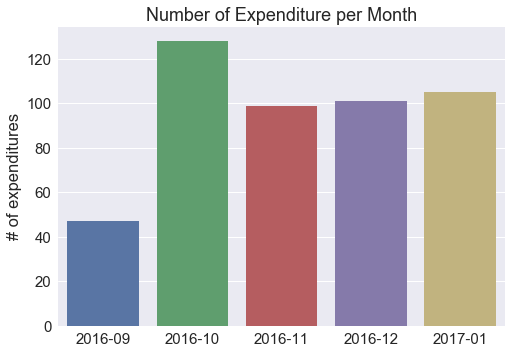

In [6]:
sns.countplot(df.YearMonth, order=year_month_order)
plt.xlabel("")
plt.ylabel("# of expenditures")
plt.title("Number of Expenditure per Month")
plt.show()

## Q: How much did I spend each month?

In [7]:
monthly_expense = abs(df[df.Amount < 0.0].groupby("YearMonth").sum()[['Amount']])
monthly_expense

,Amount
YearMonth,
2016-09,627.94
2016-10,3525.39
2016-11,4695.24
2016-12,3919.78
2017-01,2394.09


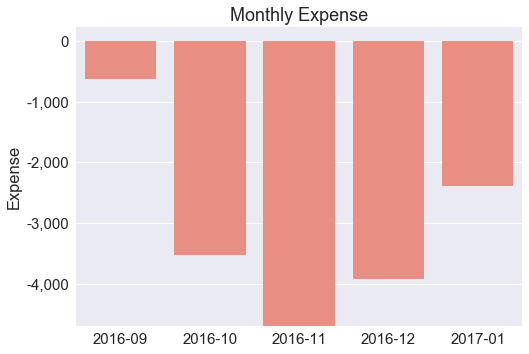

In [8]:
ax = sns.barplot(x='YearMonth', y='Amount', ci=None, data=df[df.Amount < 0], color="salmon", estimator=sum, order=year_month_order)
ax.get_yaxis().set_major_formatter( matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.title("Monthly Expense")
plt.xlabel("")
plt.ylabel("Expense")
plt.show()

# Compare to the previous month (category)

In [9]:
last_month = monthly_expense.index[-1]
month_before_last_month = monthly_expense.index[-2]

In [10]:
compare_df = df[(df.YearMonth == last_month) | (df.YearMonth == month_before_last_month)]

In [11]:
compare_df.groupby(["Kind", "YearMonth"]).sum()[['Amount']]

Amount
Kind      YearMonth         
Auto      2016-12    -279.00
          2017-01    -173.91
Clothing  2016-12    -106.17
          2017-01    -431.37
Coffee    2016-12     -12.27
          2017-01     -16.80
Foods     2016-12    -367.57
          2017-01    -311.91
Furniture 2016-12    -226.62
Goods     2016-12   -1028.09
          2017-01    -310.79
Groceries 2016-12    -773.64
          2017-01    -653.10
Internet  2017-01     -79.99
Medical   2016-12     -36.34
          2017-01     -10.00
Payment   2016-12    3688.28
          2017-01    5487.84
Phone     2016-12    -111.66
          2017-01    -111.37
Return    2017-01     149.66
Study     2016-12    -820.54
          2017-01    -211.13

## Q: which category did I spend most compared to last month?

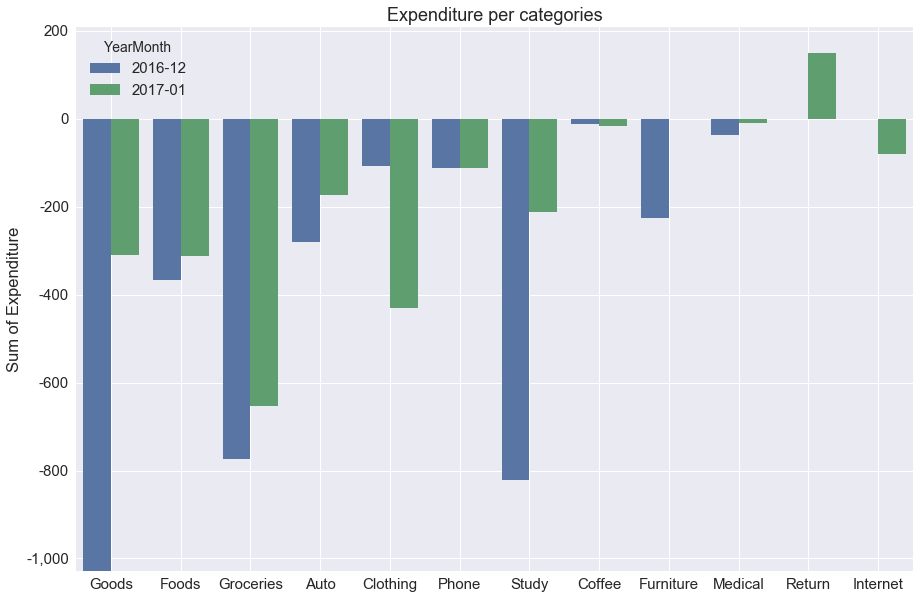

In [12]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(x='Kind', y='Amount', hue='YearMonth', estimator=sum, hue_order=year_month_order[-2:], data=compare_df[compare_df.Kind != 'Payment'], ci=None)
ax.get_yaxis().set_major_formatter( matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.grid('on')
plt.title("Expenditure per categories")
plt.xlabel("Categories")
plt.xlabel("")
plt.ylabel("Sum of Expenditure")
plt.show()